In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score

In [71]:
df_train=pd.read_csv('train.csv')

In [72]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [74]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
df_train.shape

(891, 12)

In [78]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

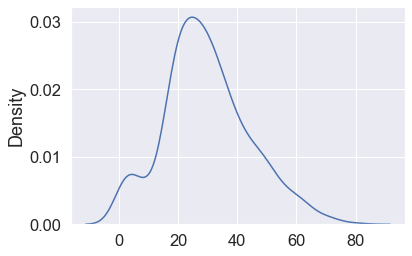

In [80]:
sns.distplot(x=df_train.Age,bins=10,hist=False)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

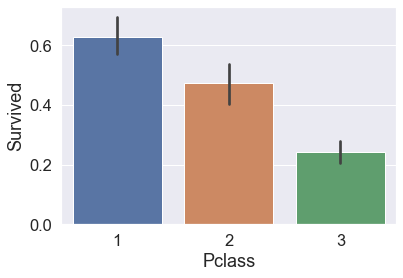

In [81]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

In [82]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [83]:
df_train[df_train['Pclass']==1]['Age'].mean()

38.233440860215055

In [84]:
print(df_train[df_train['Pclass']==1]['Age'].mean())
print(df_train[df_train['Pclass']==2]['Age'].mean())
print(df_train[df_train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [85]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [86]:
def age_approx(cols):
    Age =cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age
        

In [87]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [89]:
df_train.dropna(inplace=True)

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [91]:
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])

In [92]:
df_train_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,25.0,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [93]:
df_train_dum=pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [95]:
df_train_dum.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

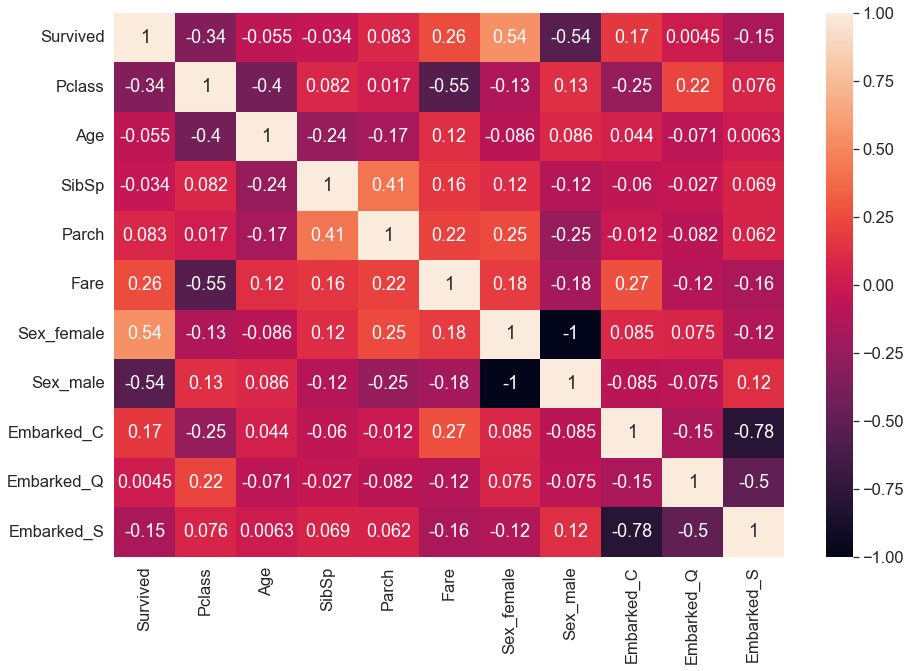

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train_dum.corr(),annot=True)

In [97]:
df_train_dum.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,-0.085564,0.085564,0.043681,-0.070847,0.006325
SibSp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,0.169966,-0.245733,0.043681,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261


In [101]:
X=df_train_dum.drop('Survived',axis=1)
y=df_train_dum['Survived']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 10)
(178, 10)
(711,)
(178,)


In [110]:
Lr=LogisticRegression()


In [116]:
Lr.fit(X_train,y_train);
y_pred=Lr.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
accuracy_score(y_pred,y_test)

0.7921348314606742

In [119]:
confusion_matrix(y_pred,y_test)

array([[87, 15],
       [22, 54]], dtype=int64)

In [121]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       102
           1       0.78      0.71      0.74        76

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [127]:
lr=list(zip(Lr.coef_))

In [134]:
lr

[(array([-1.18858737e+00, -4.63162982e-02, -3.83302244e-01, -6.71381155e-02,
          1.67551205e-03,  2.39488863e+00, -3.05517077e-01,  9.21786133e-01,
          7.28078257e-01,  4.39507160e-01]),)]

In [135]:
df_train_dum.uni

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [140]:
feature_cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [142]:
print(Lr.coef_)

[[-1.18858737e+00 -4.63162982e-02 -3.83302244e-01 -6.71381155e-02
   1.67551205e-03  2.39488863e+00 -3.05517077e-01  9.21786133e-01
   7.28078257e-01  4.39507160e-01]]


In [143]:
dfCoeffients = pd.DataFrame(data = Lr.coef_, index = feature_cols, columns = ["Slope / Coeffient"])

ValueError: Shape of passed values is (1, 10), indices imply (1, 1)